In [1]:
# length unit(foot)
# weight unit(Ounce)
# age unit(month)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

In [3]:
# reading file
train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv', index_col = 'id')
train.shape

(74051, 9)

In [4]:
# train = train[(train.Height < 0.6) & (train.Height > 0.06)].reset_index(drop =True)
# train.shape

train = train[(train.Height != 0)].reset_index(drop =True)

In [5]:
train.Sex.value_counts()

M    27084
I    23933
F    23010
Name: Sex, dtype: int64

In [6]:
train.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74027.000000,74027.000000,74027.000000,74027.000000,74027.000000,74027.000000,74027.000000,74027.000000
mean,1.317690,1.024684,0.348202,23.392066,10.107256,5.059867,6.725831,9.969592
std,0.287509,0.237198,0.091835,12.644453,5.616476,2.791964,3.583287,3.174009
min,0.187500,0.137500,0.012500,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.945627,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.040090,7.002326,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


### Transformations

In [7]:
train['Length_transform'],_ = stats.boxcox(train['Length'])

p = 0.85  # Percentile threshold
lower_threshold = np.percentile(train['Length_transform'], p)
upper_threshold = np.percentile(train['Length_transform'], 100 - p)

train['Length_transform'] = np.clip( train['Length_transform'], lower_threshold, upper_threshold )

################################

train['Diameter_transform'],_ = stats.boxcox(train['Diameter'])

p = 0.8  # Percentile threshold
lower_threshold = np.percentile(train['Diameter_transform'], p)
upper_threshold = np.percentile(train['Diameter_transform'], 100 - p)

train['Diameter_transform'] = np.clip( train['Diameter_transform'], lower_threshold, upper_threshold )

################################

train['Height_transform'],_ = stats.boxcox(train['Height'])

p = 0.8  # Percentile threshold
lower_threshold = np.percentile(train['Height_transform'], p)
upper_threshold = np.percentile(train['Height_transform'], 100 - p)

train['Height_transform'] = np.clip( train['Height_transform'], lower_threshold, upper_threshold )

################################

train['Weight_transform'],_ = stats.boxcox(train['Weight'])

p = 0.8  # Percentile threshold
lower_threshold = np.percentile(train['Weight_transform'], p)
upper_threshold = np.percentile(train['Weight_transform'], 100 - p)

train['Weight_transform'] = np.clip( train['Weight_transform'], lower_threshold, upper_threshold )

################################

train['Shucked_Weight_transform'],_ = stats.boxcox(train['Shucked Weight'])

p = 0.8  # Percentile threshold
lower_threshold = np.percentile(train['Shucked_Weight_transform'], p)
upper_threshold = np.percentile(train['Shucked_Weight_transform'], 100 - p)

train['Shucked_Weight_transform'] = np.clip( train['Shucked_Weight_transform'], lower_threshold, upper_threshold )

################################

train['Viscera_Weight_transform'],_ = stats.boxcox(train['Viscera Weight'])

p = 0.8  # Percentile threshold
lower_threshold = np.percentile(train['Viscera_Weight_transform'], p)
upper_threshold = np.percentile(train['Viscera_Weight_transform'], 100 - p)

train['Viscera_Weight_transform'] = np.clip( train['Viscera_Weight_transform'], lower_threshold, upper_threshold )

#################################

train['Shell_Weight_transform'],_ = stats.boxcox(train['Shell Weight'])

p = 0.8  # Percentile threshold
lower_threshold = np.percentile(train['Shell_Weight_transform'], p)
upper_threshold = np.percentile(train['Shell_Weight_transform'], 100 - p)

train['Shell_Weight_transform'] = np.clip( train['Shell_Weight_transform'], lower_threshold, upper_threshold )

In [8]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_transform,Diameter_transform,Height_transform,Weight_transform,Shucked_Weight_transform,Viscera_Weight_transform,Shell_Weight_transform
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.711273,0.193055,-0.594200,13.900452,6.702593,3.856736,4.942985
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0.106517,-0.157297,-0.681130,6.010396,2.607002,1.138662,1.950297
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.487856,0.119937,-0.594200,12.294999,6.092751,3.245791,4.003048
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.035627,0.513996,-0.481442,21.331687,9.727145,6.025219,8.215835
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0.291285,0.012591,-0.627185,11.706794,6.375682,2.621015,3.587904


In [9]:
# train['Volume'] = 3.14 *  (train['Diameter']/2) * (train['Diameter']/2) * train['Height']
# train['Density'] = train['Weight']/train['Volume']
# train['Aspect_ratio'] = train['Length']/train['Diameter']
# train['BMI'] = train['Weight']/(train['Height'] * train['Height'])

# train['Shucked_by_wt'] = train['Shucked Weight']/train['Weight']
# train['Viscera_by_wt'] = train['Viscera Weight']/train['Weight']
# train['Shell_by_wt'] = train['Shell Weight']/train['Weight']

# train['Length_into_Height'] = train['Length'] * train['Height']
# train['Length_into_Diameter'] = train['Length'] * train['Diameter']
# train['Length_into_Weight'] = train['Length'] * train['Weight']

# #Euclidean norm or the 2-norm (L2-norm)
# train['L2_weights'] = np.sqrt(train['Shucked Weight']**2 + train['Viscera Weight']**2 + train['Shell Weight']**2)

In [10]:
# train = train[train.Volume < 1.5].reset_index(drop =True)
# train = train[train.Density < 200].reset_index(drop =True)
# train = train[(train.Aspect_ratio >0.9) & (train.Aspect_ratio < 1.9)].reset_index(drop =True)
# train = train[train.BMI < 450].reset_index(drop =True)
# train = train[train.Shucked_by_wt < 1 ].reset_index(drop =True)
# train = train[train.Viscera_by_wt < 0.5 ].reset_index(drop =True)
# train = train[train.Shell_by_wt < 0.7 ].reset_index(drop =True)

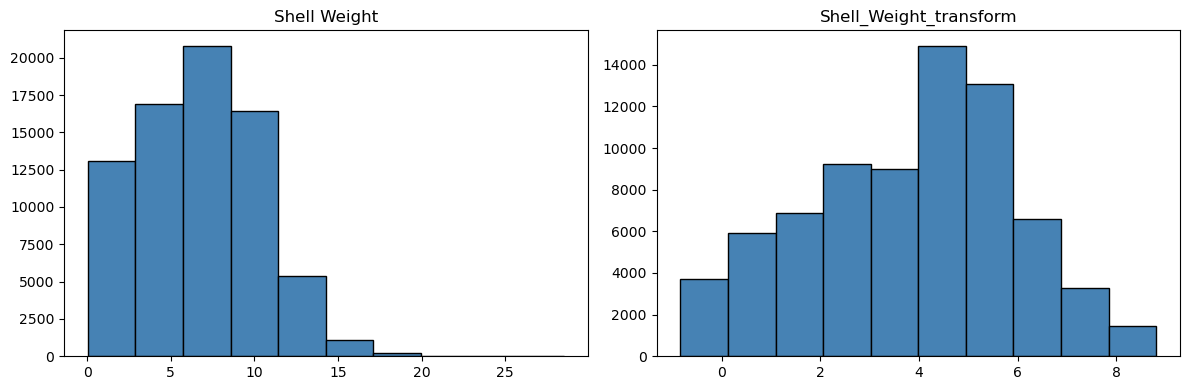

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].hist(train['Shell Weight'], bins=10, edgecolor='black', color='steelblue')
axes[1].hist(train['Shell_Weight_transform'], bins=10, edgecolor='black', color='steelblue')

axes[0].set_title('Shell Weight')
axes[1].set_title('Shell_Weight_transform')

plt.tight_layout()
plt.show()

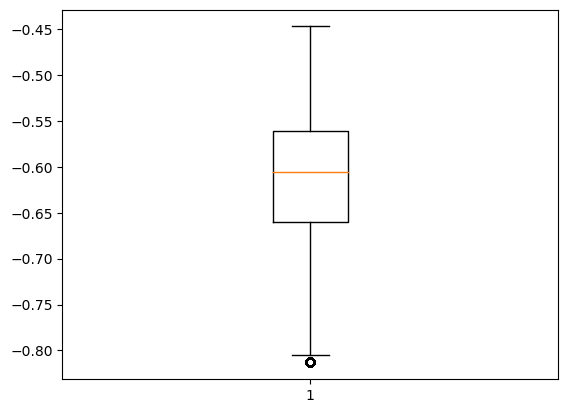

In [12]:
plt.boxplot(train.Height_transform)
plt.show()

In [13]:
# Calculate the correlation matrix
train.corr(numeric_only = True)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_transform,Diameter_transform,Height_transform,Weight_transform,Shucked_Weight_transform,Viscera_Weight_transform,Shell_Weight_transform
Length,1.000000,0.989418,0.918402,0.936407,0.915529,0.917872,0.916954,0.612374,0.982606,0.970697,0.925325,0.965730,0.953515,0.952190,0.949852
Diameter,0.989418,1.000000,0.921415,0.938273,0.914199,0.918357,0.922683,0.620800,0.972014,0.984216,0.928714,0.967148,0.952020,0.952445,0.954677
Height,0.918402,0.921415,1.000000,0.902231,0.864457,0.883557,0.903847,0.637759,0.908097,0.911499,0.989940,0.923343,0.894671,0.909611,0.926018
Weight,0.936407,0.938273,0.902231,1.000000,0.971242,0.971037,0.965493,0.600839,0.968784,0.968390,0.916290,0.991807,0.968073,0.967634,0.964294
Shucked Weight,0.915529,0.914199,0.864457,0.971242,1.000000,0.942576,0.910317,0.502877,0.947897,0.943486,0.877182,0.963413,0.988275,0.939282,0.914206
Viscera Weight,0.917872,0.918357,0.883557,0.971037,0.942576,1.000000,0.933860,0.576436,0.949505,0.947236,0.897495,0.965466,0.941780,0.990157,0.935761
Shell Weight,0.916954,0.922683,0.903847,0.965493,0.910317,0.933860,1.000000,0.663173,0.943840,0.948575,0.918129,0.962480,0.916735,0.936183,0.991339
Age,0.612374,0.620800,0.637759,0.600839,0.502877,0.576436,0.663173,1.000000,0.597091,0.607692,0.644978,0.621100,0.538009,0.601812,0.675248
Length_transform,0.982606,0.972014,0.908097,0.968784,0.947897,0.949505,0.943840,0.597091,1.000000,0.985269,0.919990,0.979424,0.964573,0.963719,0.959015
Diameter_transform,0.970697,0.984216,0.911499,0.968390,0.943486,0.947236,0.948575,0.607692,0.985269,1.000000,0.923496,0.979395,0.961076,0.962195,0.963440


In [14]:
train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Length_transform',
       'Diameter_transform', 'Height_transform', 'Weight_transform',
       'Shucked_Weight_transform', 'Viscera_Weight_transform',
       'Shell_Weight_transform'],
      dtype='object')

<Axes: xlabel='Shell_Weight_transform', ylabel='Age'>

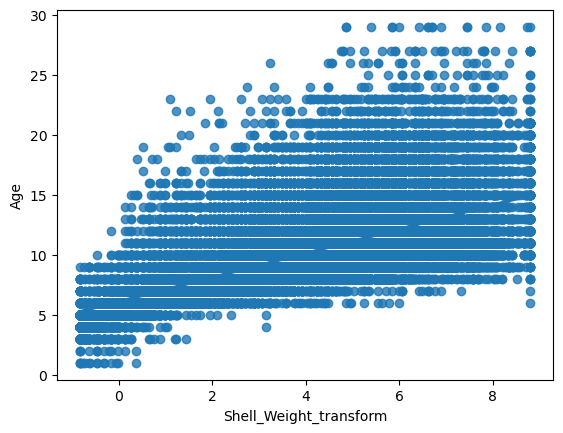

In [15]:
sns.regplot(x= train['Shell_Weight_transform'] , y= train.Age)